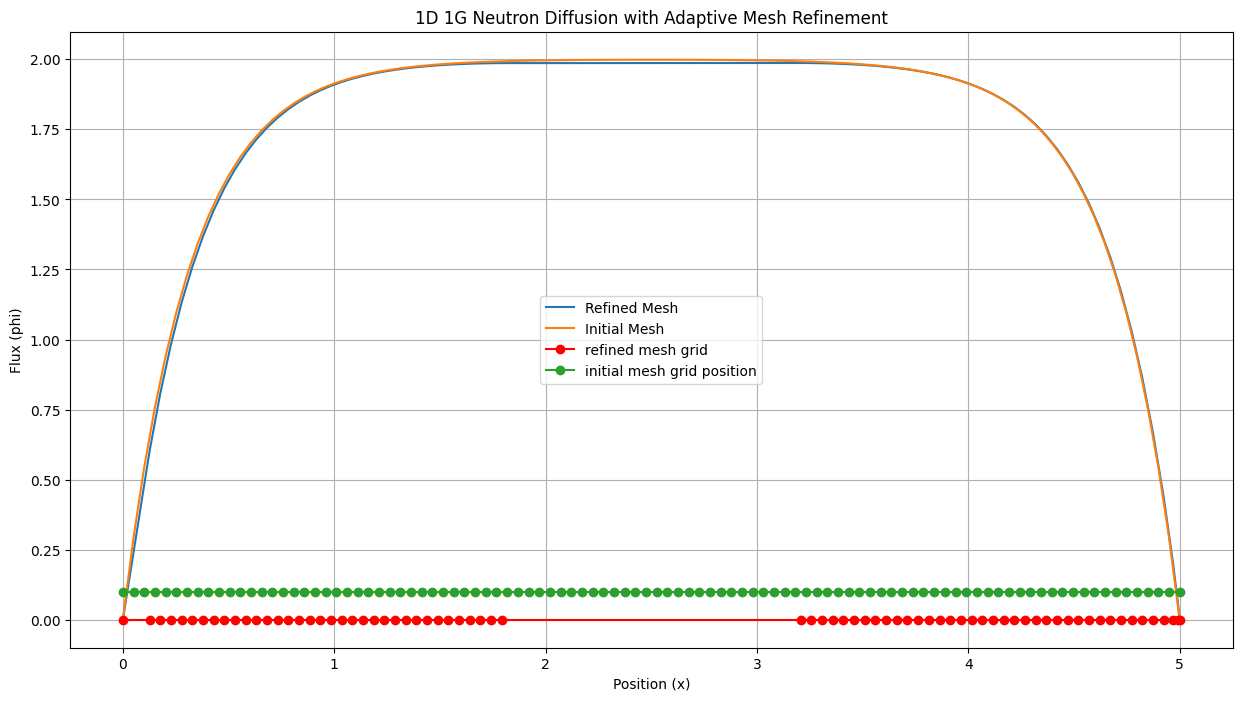

DOF after refinement: 73 
DOF before refinement: 100


In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 5.0  # length of the domain
N=100 #initial grid number 
max_refinements =3 # maximum number of refinement levels
tolerance = 1e-2# gradient tolerance for refinement

# Neutron Diffusion Parameters
D = 1.0  # diffusion coefficient
Sigma_a = 0.5  # absorption cross-section
S = 1.0  # constant source term


# Function to create the finite difference matrix for a given grid

def create_matrix(grid):
    n = len(grid)
    A = np.zeros((n, n))
    b = np.zeros(n)
    dx = np.diff(grid)

    for i in range(1, n-1):
        
        A[i, i-1] = D / dx[i-1]
        A[i, i] = -(D / dx[i-1] + D / dx[i] + Sigma_a)
        A[i, i+1] = D / dx[i]
        b[i] = -S



    # Boundary conditions
    A[0, 0] = 1
    A[-1, -1] = 1

    return A, b

# Function to adaptively refine the mesh
def refine_mesh(grid, phi):

    new_grid = [grid[0]] #fixing the staring point 

    for i in range(1, len(grid)-1):
      
        gradient = abs((phi[i+1] - phi[i]) / (grid[i+1] - grid[i]))
        
        """if i==1:
            new_grid.append(grid[i]+0.0001*gradient*(grid[i+1] - grid[i]))
        else:
            new_grid.append(grid[i])"""


        if gradient > tolerance:
            
            new_grid.append((grid[i] + grid[i+1]) / 2)  # Add midpoint
        
            

    new_grid.append(grid[-1])  # Fixing the ending point

    return np.array(new_grid)

# Initial coarse grid
grid_x = np.linspace(0, L, N)
grid=np.linspace(0, L, N) #initialmesh should be same 
A, b = create_matrix(grid_x)  # Create the matrix for the initial grid
phi_x = np.linalg.solve(A,b)  #initial solution without refinement 



for refinement in range(max_refinements):

    # Solve on the current grid
    A, b = create_matrix(grid)
    phi = np.linalg.solve(A, b)

    # Refine the grid based on the gradient
    new_grid = refine_mesh(grid, phi)

    # If the grid hasn't changed, break
    if len(new_grid) == len(grid):
        print('Optimum refinement done after',refinement,'th refinement')
        break

    # Update grid and recompute the flux
    grid = new_grid

# Recalculate phi after the final refinement to ensure it matches the grid size
A, b = create_matrix(grid)  
phi = np.linalg.solve(A, b) # This line ensures phi is calculated for the final refined grid

plt.figure(figsize=(15,8))
plt.plot(grid, phi, label='Refined Mesh')
plt.plot(grid_x, phi_x, label='Initial Mesh')
plt.plot(grid,np.zeros_like(grid),marker='o',color='red',label='refined mesh grid')
plt.plot(grid_x,0.1*np.ones_like(grid_x),marker='o',label='initial mesh grid position')
plt.xlabel('Position (x)')
plt.ylabel('Flux (phi)')
plt.title('1D 1G Neutron Diffusion with Adaptive Mesh Refinement')
plt.grid(True)
plt.legend()
plt.show()


print('DOF after refinement:',len(grid),'\nDOF before refinement:',len(grid_x))
